In [16]:
import cvxpy as cp
import numpy as np
from scipy import *
import scipy as sci
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize
from scipy.optimize import fsolve
from autograd import grad
from autograd import numpy as anp
from scipy.optimize import root
import matplotlib.pyplot as plt
from autograd import grad, hessian
from autograd import numpy as anp
from autograd import numpy as anp
import sympy as sp
import autograd.numpy as np_auto
from autograd import grad
from scipy.optimize import minimize
from scipy.optimize import minimize, minimize_scalar

# 1a)
Hàm mục tiêu : f = 250000x + 180000y

subject to : 12x + 9y <= 900

x >= 0, x <= 45, y >= 0, y <= 80


# 1b)

In [2]:
# Khai báo các biến
x = cp.Variable(2, nonneg=True)

# Hàm mục tiêu (tối đa hóa doanh thu)
objective = cp.Maximize(250000*x[0] + 180000*x[1] )

# Các ràng buộc
constraints = [
    12*x[0] + 9*x[1] <= 900,
    x[0] >= 0, x[0] <= 45, x[1] >= 0, x[1] <= 80
]

# Tạo và giải bài toán
problem = cp.Problem(objective, constraints)
problem.solve()

# In kết quả
if problem.status == cp.OPTIMAL:
    print(f"  so luong radio 1 (x1): {x.value[0]:.2f}")
    print(f"  so luong raido 2: {x.value[1]:.2f}")
    
    print(f"Loi nhuan tối đa: {problem.value:.2f} ")
else:
    print("Bài toán không tìm thấy lời giải tối ưu.")
    print(problem.status)

  so luong radio 1 (x1): 45.00
  so luong raido 2: 40.00
Loi nhuan tối đa: 18450000.00 


# 2a)

In [3]:
def f(x):
    """Hàm mục tiêu f(x1, x2)"""
    x1, x2 = x[0], x[1]
    A = np.array([[1, 0], [0, -2]])
    b = np.array([2, 4])
    return anp.exp(2 * x1) + 0.5 * ((x1-2)**2 + (-2*x2 - 4)**2)
grad_f = grad(lambda x: f(x))  # đạo hàm tự động của f(x) theo vector x
from scipy.optimize import minimize

def find_optimum(grad_f, f):
    """
    Tìm x* và p* bằng cách tối thiểu hóa ||∇f(x)||²
    """
    x0 = np.zeros(2)
    # định nghĩa hàm phụ
    def g_norm2(x): 
        g = grad_f(x)
        return np.sum(g**2)
    
    res = minimize(g_norm2, x0, method='BFGS')
    x_star = res.x
    p_star = f(x_star)
    return x_star, p_star
# Gọi hàm tìm nghiệm
x_star, p_star = find_optimum(grad_f, f)

print("\n--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---")
print(f"x* = {x_star}")
print(f"p* = f(x*) = {p_star:.6f}")


--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---
x* = [-6.87943125e-09 -2.00000002e+00]
p* = f(x*) = 3.000000



--- Quá trình cập nhật x^(k) cua eta0 ---
k= 0: x1=-3.000000, x2=5.000000, f(x)=110.50247875217667
k= 1: x1=-1.001983, x2=-6.200000, f(x)=39.92075057735501
k= 2: x1=0.090971, x2=0.520000, f(x)=15.722540241608963
k= 3: x1=-0.105052, x2=-3.512000, f(x)=7.598410130547686
k= 4: x1=0.088569, x2=-1.092800, f(x)=4.66660381395919
k= 5: x1=-0.101895, x2=-2.544320, f(x)=3.617183675622657
k= 6: x1=0.086356, x2=-1.673408, f(x)=3.2328653034626402
k= 7: x1=-0.099006, x2=-2.195955, f(x)=3.1000699626452084
k= 8: x1=0.084308, x2=-1.882427, f(x)=3.0462504833899042
k= 9: x1=-0.096348, x2=-2.070544, f(x)=3.0320230373229626
k=10: x1=0.082405, x2=-1.957674, f(x)=3.021337443320407
k=11: x1=-0.093892, x2=-2.025396, f(x)=3.022275637789714
k=12: x1=0.080630, x2=-1.984763, f(x)=3.0174454468034595
k=13: x1=-0.091615, x2=-2.009142, f(x)=3.02017026090515
k=14: x1=0.078969, x2=-1.994515, f(x)=3.016333958983075
k=15: x1=-0.089494, x2=-2.003291, f(x)=3.019130142604504
k=16: x1=0.077411, x2=-1.998025, f(x)=3.015632075

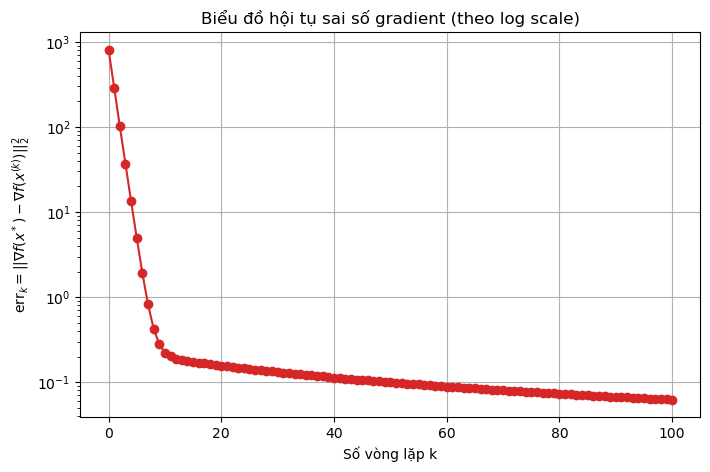


--- Quá trình cập nhật x^(k) cua eta1 ---
k= 0: x1=-3.000000, x2=5.000000, f(x)=110.50247875217667
k= 1: x1=-0.502479, x2=-9.000000, f(x)=101.49726014298585
k= 2: x1=0.382700, x2=5.000000, f(x)=101.45768495210181
k= 3: x1=-0.958506, x2=-9.000000, f(x)=102.5234239991289
k= 4: x1=0.373701, x2=5.000000, f(x)=101.43393235300354
k= 5: x1=-0.924658, x2=-9.000000, f(x)=102.43415707765587
k= 6: x1=0.380326, x2=5.000000, f(x)=101.45134339851889
k= 7: x1=-0.949509, x2=-9.000000, f(x)=102.49951652903547
k= 8: x1=0.375530, x2=5.000000, f(x)=101.43869658005839
k= 9: x1=-0.931480, x2=-9.000000, f(x)=102.45200047139318
k=10: x1=0.379047, x2=5.000000, f(x)=101.44795004341692
k=11: x1=-0.944683, x2=-9.000000, f(x)=102.48674588968606
k=12: x1=0.376491, x2=5.000000, f(x)=101.4412128978048
k=13: x1=-0.935077, x2=-9.000000, f(x)=102.46143734403046
k=14: x1=0.378362, x2=5.000000, f(x)=101.44613666762216
k=15: x1=-0.942100, x2=-9.000000, f(x)=102.47992776302074
k=16: x1=0.376999, x2=5.000000, f(x)=101.44254

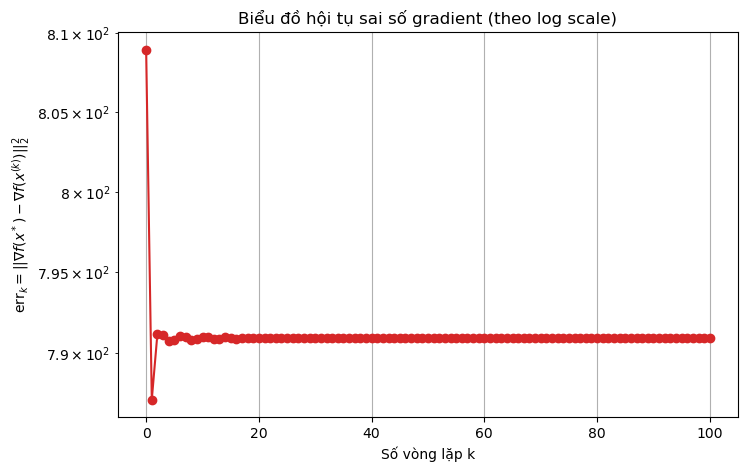

In [4]:
def gradient_descent_2d(f, grad_f, x_init, learning_rate, num_iterations, tolerance=1e-8):
    """
    Thuật toán Gradient Descent tổng quát cho hàm 2 biến
    """
    x = x_init
    history = {'x': [x.copy()], 'f': [f(x)], 'gradient': [grad_f(x)], 'step_size': [], 'grad_norm2': [np.linalg.norm(grad_f(x))**2]}
    
    for i in range(num_iterations):
        g = grad_f(x)
        if np.linalg.norm(g) < tolerance:
            print(f"Hội tụ tại vòng lặp {i+1}, ||∇f|| = {np.linalg.norm(g):.2e}")
            break
        x_new = x - learning_rate * g
        step_size = np.linalg.norm(x_new - x)
        x = x_new
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['gradient'].append(g)
        history['step_size'].append(step_size)
        history['grad_norm2'].append(np.linalg.norm(grad_f(x))**2)
    return history
x0 = np.array([-3., 5.])
eta = np.array([2/5, 1/2])
iterations = 100
history1 = gradient_descent_2d(f, grad_f, x0, eta[0], iterations)
history2 = gradient_descent_2d(f, grad_f, x0, eta[1], iterations)
print("\n--- Quá trình cập nhật x^(k) cua eta0 ---")
for i, xi in enumerate(history1["x"]):
    print(f"k={i:2d}: x1={xi[0]:.6f}, x2={xi[1]:.6f}, f(x)={f(xi)}")
err_k = np.array(history1['grad_norm2'])  # vì ∇f(x*)=0
plt.figure(figsize=(8,5))
plt.plot(err_k, marker='o', color='tab:red')
plt.yscale('log')
plt.xlabel("Số vòng lặp k")
plt.ylabel(r"$\mathrm{err}_k = ||\nabla f(x^*) - \nabla f(x^{(k)})||_2^2$")
plt.title("Biểu đồ hội tụ sai số gradient (theo log scale)")
plt.grid(True)
plt.show()
print("\n--- Quá trình cập nhật x^(k) cua eta1 ---")
for i, xi in enumerate(history2["x"][:-1]):
    print(f"k={i:2d}: x1={xi[0]:.6f}, x2={xi[1]:.6f}, f(x)={f(xi)}")
err_k1 = np.array(history2['grad_norm2'])  # vì ∇f(x*)=0
plt.figure(figsize=(8,5))
plt.plot(err_k1, marker='o', color='tab:red')
plt.yscale('log')
plt.xlabel("Số vòng lặp k")
plt.ylabel(r"$\mathrm{err}_k = ||\nabla f(x^*) - \nabla f(x^{(k)})||_2^2$")
plt.title("Biểu đồ hội tụ sai số gradient (theo log scale)")
plt.grid(True)
plt.show()

# 3a

In [5]:
def create_problem(n, m):
    """
    Tạo ngẫu nhiên các vector và số cần thiết cho bài toán.
    Args:
        n (int): Kích thước của vector x.
        m (int): Số lượng các vector a_i và b_i.
    Returns:
        tuple: (c, A, b)
    """
    c = np.random.randn(n)
    A = np.random.randn(m, n)  # Mỗi hàng là một vector a_i
    b = np.random.randn(m)
    return c, A, b

# Khởi tạo các tham số của bài toán
n_dim = 3    # Kích thước của vector x
m_terms = 5  # Số lượng các hạng tử
c, A, b = create_problem(n_dim, m_terms)

# Định nghĩa hàm mục tiêu f(x)
def f(x, c, A, b):
    """
    Hàm mục tiêu f(x) = c^T x - sum(log(b_i - a_i^T x))
    """
    # Sử dụng numpy của autograd
    term1 = anp.dot(c.T, x)
    
    # anp.dot(A, x) tương đương với a_i^T * x cho mỗi a_i trong A
    exp_terms = anp.log(b - anp.dot(A, x))
    term2 = anp.sum(exp_terms)
    
    return term1 - term2

# Tạo các hàm tính gradient và hessian tự động bằng autograd
# Chúng ta cần gói hàm f để chỉ phụ thuộc vào x
f_wrapped = lambda x: f(x, c, A, b)
grad_f = grad(f_wrapped)
hessian_f = hessian(f_wrapped)

# Điểm để tính toán
x_test = np.random.randn(n_dim)

# --- Tính toán bằng autograd (số học) ---
grad_autograd = grad_f(x_test)
hessian_autograd = hessian_f(x_test)

print("--- Kết quả từ Autograd (tính toán số) ---")
print(f"Gradient (∇f) tại x = {x_test}:\n{grad_autograd}\n")
print(f"Hessian (∇²f) tại x = {x_test}:\n{hessian_autograd}\n")

# --- Tính toán bằng công thức giải tích ---
# Gradient
grad_manual = c - np.dot(A.T, np.exp(b - np.dot(A, x_test)))

# Hessian
hessian_manual = np.zeros((n_dim, n_dim))
for i in range(m_terms):
    a_i = A[i, :]
    exp_term = np.exp(b[i] - np.dot(a_i, x_test))
    hessian_manual += exp_term * np.outer(a_i, a_i)

print("--- Kết quả từ Công thức giải tích ---")
print(f"Gradient (∇f) tại x = {x_test}:\n{grad_manual}\n")
print(f"Hessian (∇²f) tại x = {x_test}:\n{hessian_manual}\n")

# Kiểm tra xem Hessian có nửa xác định dương hay không
eigenvalues = np.linalg.eigvalsh(hessian_autograd)
print("--- Kiểm tra tính lồi ---")
print(f"Giá trị riêng của ma trận Hessian:\n{eigenvalues}")
if np.all(eigenvalues >= 0):
    print("-> Tất cả giá trị riêng đều không âm, do đó hàm f là lồi.")
else:
    print("-> Có giá trị riêng âm, hàm f không lồi.")

--- Kết quả từ Autograd (tính toán số) ---
Gradient (∇f) tại x = [-0.02899873 -0.15195519  1.080567  ]:
[-1.71039432  2.85684654 -1.33789703]

Hessian (∇²f) tại x = [-0.02899873 -0.15195519  1.080567  ]:
[[12.0066874  -5.87081444  0.74602296]
 [-5.87081444  5.32783548  0.32124485]
 [ 0.74602296  0.32124485  5.57260489]]

--- Kết quả từ Công thức giải tích ---
Gradient (∇f) tại x = [-0.02899873 -0.15195519  1.080567  ]:
[ 1.84718021 -6.04943323  2.83002163]

Hessian (∇²f) tại x = [-0.02899873 -0.15195519  1.080567  ]:
[[ 6.43737104  1.42307186  1.50943826]
 [ 1.42307186  5.47727695 -0.40698336]
 [ 1.50943826 -0.40698336  3.10092549]]

--- Kiểm tra tính lồi ---
Giá trị riêng của ma trận Hessian:
[ 1.79967928  5.66231936 15.44512913]
-> Tất cả giá trị riêng đều không âm, do đó hàm f là lồi.


C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


In [6]:
def f(x):
    """
    Hàm mục tiêu f(x) = c^T x - sum(log(b_i - a_i^T x))
    
    """
    A = anp.array([[0, -2, -1, -2], 
                   [-1, 1, -3, 0],
                   [1, -1, 2, -5]])
    b = anp.array([3, -1, 3, 2])
    c = anp.array([4, 11/4, 13/4])
    # Sử dụng numpy của autograd
    # Tính A^T x
    Ax = anp.dot(A.T, x)

    # Kiểm tra miền xác định log
    if anp.any(b - Ax <= 0):
        return anp.inf  # log không xác định
    term1 = anp.dot(c.T, x)
    
    # anp.dot(A, x) tương đương với a_i^T * x cho mỗi a_i trong A
    exp_terms = anp.log(b - anp.dot(A.T, x))
    term2 = anp.sum(exp_terms)
    
    return term1 - term2
grad_f = grad(lambda x: f(x))  # đạo hàm tự động của f(x) theo vector x
def find_optimum(grad_f, f):
    """
    Tìm x* và p* bằng cách tối thiểu hóa ||∇f(x)||²
    """
    x0 = np.zeros(3)
    # định nghĩa hàm phụ
    def g_norm2(x): 
        g = grad_f(x)
        return np.sum(g**2)
    
    res = minimize(g_norm2, x0, method='BFGS')
    x_star = res.x
    p_star = f(x_star)
    return x_star, p_star
# Gọi hàm tìm nghiệm
x_star, p_star = find_optimum(grad_f, f)

print("\n--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---")
print(f"x* = {x_star}")
print(f"p* = f(x*) = {p_star:.6f}")



--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---
x* = [0. 0. 0.]
p* = f(x*) = inf


C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:16: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [7]:
import autograd.numpy as anp
from autograd import grad
from scipy.optimize import minimize
import numpy as np

# ------------------------------------------------------------
# Hàm mục tiêu f(x)
# ------------------------------------------------------------
def f(x):
    """
    f(x) = c^T x - sum(log(b_i - a_i^T x))
    """
    A = anp.array([
        [0, -2, -1, -2],
        [-1, 1, -3, 0],
        [1, -1, 2, -5]
    ])
    b = anp.array([3, 19, 45, 2])   # theo đề
    c = anp.array([4, 11/4, 13/4]) # theo đề

    # Tính A^T x
    Ax = anp.dot(A.T, x)

    # Kiểm tra miền xác định log
    if anp.any(b - Ax <= 0):
        print("log khong xac dinh")
        return anp.inf  # log không xác định

    return anp.dot(c.T, x) - anp.sum(anp.exp(b - Ax))

# ------------------------------------------------------------
# Tạo gradient bằng autograd
# ------------------------------------------------------------
grad_f = grad(f)

# ------------------------------------------------------------
# Tìm nghiệm tối ưu x*
# ------------------------------------------------------------
def find_optimum(f, grad_f):
    x0 = np.zeros(3)  # 3 biến
    res = minimize(f, x0, jac=grad_f, method='BFGS')
    return res.x, f(res.x)

# ------------------------------------------------------------
# Thực thi
# ------------------------------------------------------------
x_star, p_star = find_optimum(f, grad_f)
print("\n--- KẾT QUẢ TỐI ƯU ---")
print(f"x* = {x_star}")
print(f"f(x*) = {p_star:.6f}")



log khong xac dinh
log khong xac dinh
log khong xac dinh
log khong xac dinh
log khong xac dinh
log khong xac dinh
log khong xac dinh

--- KẾT QUẢ TỐI ƯU ---
x* = [0. 0. 0.]
f(x*) = -34934271057663578112.000000


In [8]:
import numpy as np
from autograd import grad
from autograd import numpy as anp
from scipy.optimize import minimize

# Định nghĩa hàm mục tiêu f(x)
def f(x):
    """
    Hàm mục tiêu f(x) = c^T x - sum(log(b_i - a_i^T x))
    """
    # SỬA LỖI: Cấu trúc lại A, b, c để khớp kích thước
    # Giả sử n = 3 (kích thước của x) và m = 4 (số hạng tử)
    A = anp.array([
        [0, -1, 1],  # a1
        [-2, 1, -1],  # a2
        [-1, -3, 2],  # a3
        [-2, 0, -5]   # a4
    ])
    b = anp.array([3, -3, 1, 2])
    c = anp.array([4, 11/4, 13/4])

    # anp.dot(A, x) tương đương với a_i^T * x cho mỗi a_i
    term1 = anp.dot(c.T, x)
    
    # anp.dot(A, x) sẽ cho ra một vector 4 chiều, khớp với b
    log_terms = anp.log(b - anp.dot(A, x))
    term2 = anp.sum(log_terms)
    
    return term1 - term2

grad_f = grad(lambda x: f(x))  # đạo hàm tự động của f(x) theo vector x

def find_optimum(grad_f, f):
    """
    Tìm x* và p* bằng cách tối thiểu hóa hàm mục tiêu trực tiếp.
    """
    x0 = np.zeros(3)
    
    # SỬA LỖI: Tối thiểu hóa hàm f(x) trực tiếp, không phải ||∇f(x)||²
    res = minimize(f, x0, method='BFGS', jac=grad_f)
    
    x_star = res.x
    p_star = res.fun
    return x_star, p_star

# Gọi hàm tìm nghiệm
x_star, p_star = find_optimum(grad_f, f)

print("\n--- KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---")
print(f"x* = {x_star}")
print(f"p* = f(x*) = {p_star:.6f}")


--- KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---
x* = [-2730.66666667   938.66666667 -3498.66666667]
p* = f(x*) = nan


C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


In [9]:
# ================================================================
# 🧠 BÀI TOÁN: f(x) = c^T x - Σ log(b_i - a_i^T x)
# Tìm x* và f(x*) với dữ kiện trong đề
# ================================================================

import autograd.numpy as anp
from autograd import grad, hessian
from scipy.optimize import minimize
import numpy as np

# ================================================================
# 1️⃣ Hàm khởi tạo dữ liệu bài toán
# ================================================================
def create_problem_data():
    """Khởi tạo dữ kiện của bài toán"""
    A = anp.array([
        [0, -2, -1, -2],
        [-1, 1, -3, 0],
        [1, -1, 2, -5]
    ])  # Ma trận 3x4
    b = anp.array([3, -1, 3, 2])  # b_i
    c = anp.array([4, 11/4, 13/4])  # c vector
    return A, b, c

# ================================================================
# 2️⃣ Định nghĩa hàm mục tiêu và gradient/hessian
# ================================================================
def f_objective(x, c, A, b):
    """Hàm mục tiêu f(x) = c^T x - Σ log(b_i - a_i^T x)"""
    Ax = anp.dot(A.T, x)  # mỗi phần tử a_i^T x
    if anp.any(b - Ax <= 0):
        return anp.inf  # ngoài miền xác định log
    return anp.dot(c.T, x) - anp.sum(anp.log(b - Ax))

# Gradient và Hessian bằng autograd
def make_grad_and_hessian(f, c, A, b):
    f_wrapped = lambda x: f(x, c, A, b)
    grad_f = grad(f_wrapped)
    hess_f = hessian(f_wrapped)
    return grad_f, hess_f, f_wrapped

# ================================================================
# 3️⃣ Hàm kiểm tra tính lồi bằng eigenvalues của Hessian
# ================================================================
def check_convexity(hess_f, x0):
    H = hess_f(x0)
    eigvals = np.linalg.eigvalsh(H)
    print("\n--- KIỂM TRA TÍNH LỒI ---")
    print("Giá trị riêng của Hessian:\n", eigvals)
    if np.all(eigvals >= 0):
        print("✅ Hessian không âm ⇒ f(x) là hàm lồi.")
    else:
        print("❌ Có giá trị riêng âm ⇒ f(x) không lồi.")

# ================================================================
# 4️⃣ Hàm tìm nghiệm tối ưu x* (dùng BFGS hoặc Newton-CG)
# ================================================================
def find_optimum(f, grad_f, hess_f, c, A, b, x0):
    f_wrapped = lambda x: f(x, c, A, b)
    result = minimize(f_wrapped, x0, method='Newton-CG', jac=grad_f, hess=hess_f)
    x_star = result.x
    f_star = f_wrapped(x_star)
    return x_star, f_star, result

# ================================================================
# 5️⃣ Chạy toàn bộ quy trình
# ================================================================
if __name__ == "__main__":
    A, b, c = create_problem_data()
    grad_f, hess_f, f_wrapped = make_grad_and_hessian(f_objective, c, A, b)
    
    # Khởi tạo điểm ban đầu trong miền xác định log
    x0 = anp.array([0.0, 0.0, 0.0])
    
    print("=== BẮT ĐẦU GIẢI BÀI TOÁN ===")
    print("A =\n", A)
    print("b =", b)
    print("c =", c)
    
    # Kiểm tra tính lồi tại điểm ban đầu
    check_convexity(hess_f, x0)
    
    # Giải bài toán
    x_star, f_star, result = find_optimum(f_objective, grad_f, hess_f, c, A, b, x0)
    
    print("\n--- KẾT QUẢ TỐI ƯU ---")
    print(f"x* = {x_star}")
    print(f"f(x*) = {f_star:.6f}")
    print("Trạng thái hội tụ:", result.message)


=== BẮT ĐẦU GIẢI BÀI TOÁN ===
A =
 [[ 0 -2 -1 -2]
 [-1  1 -3  0]
 [ 1 -1  2 -5]]
b = [ 3 -1  3  2]
c = [4.   2.75 3.25]

--- KIỂM TRA TÍNH LỒI ---
Giá trị riêng của Hessian:
 [0. 0. 0.]
✅ Hessian không âm ⇒ f(x) là hàm lồi.

--- KẾT QUẢ TỐI ƯU ---
x* = [0. 0. 0.]
f(x*) = inf
Trạng thái hội tụ: Optimization terminated successfully.


C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:16: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [10]:
import numpy as np
from autograd import grad, hessian
from autograd import numpy as anp
from scipy.optimize import minimize

# ======================================================================
# 1. Định nghĩa các hàm và dữ liệu
# ======================================================================
def create_problem_data():
    """
    Tạo các tham số cho bài toán dựa trên đề bài.
    """
    # Ma trận A được định nghĩa sao cho mỗi hàng là a_i^T
    # để phép nhân anp.dot(A, x) có kích thước (4, 1) khớp với b
    A = anp.array([
        [0, -1, 1],
        [-2, 1, -1],
        [-1, -3, 2],
        [-2, 0, -5]
    ])
    
    b = anp.array([3.0, -1.0, 3.0, 2.0])
    c = anp.array([4.0, 11/4.0, 13/4.0])
    
    return A, b, c

def f_objective(x, c, A, b):
    """
    Hàm mục tiêu f(x) = c^T x - sum(log(b_i - a_i^T x))
    """
    term1 = anp.dot(c.T, x)
    log_terms = anp.log(b - anp.dot(A, x))
    term2 = anp.sum(log_terms)
    
    return term1 - term2

# ======================================================================
# 2. Hàm giải bài toán tối ưu
# ======================================================================
def solve_convex_problem(f, grad_f, hessian_f, x_init):
    """
    Tìm điểm tối ưu x* của một hàm lồi bằng phương pháp Newton-CG.
    
    Args:
        f (function): Hàm mục tiêu.
        grad_f (function): Gradient của hàm mục tiêu (từ autograd).
        hessian_f (function): Ma trận Hessian của hàm mục tiêu (từ autograd).
        x_init (np.array): Điểm khởi tạo ban đầu.
    
    Returns:
        tuple: (x_star, p_star) là điểm và giá trị tối ưu.
    """
    result = minimize(f, x_init, method='Newton-CG', jac=grad_f, hess=hessian_f)
    
    if result.success:
        x_star = result.x
        p_star = result.fun
        return x_star, p_star
    else:
        print("Tối ưu hóa thất bại.")
        return None, None

# ======================================================================
# 3. Chạy chương trình chính
# ======================================================================
if __name__ == "__main__":
    # Tạo dữ liệu bài toán
    A, b, c = create_problem_data()
    
    # Gói hàm mục tiêu để sử dụng trong scipy.optimize
    f_wrapped = lambda x: f_objective(x, c, A, b)
    
    # Tạo các hàm đạo hàm tự động bằng autograd
    grad_f = grad(f_wrapped)
    hessian_f = hessian(f_wrapped)
    
    # Khởi tạo điểm ban đầu. Kích thước của x là n=3.
    x_init = np.zeros(A.shape[1])
    
    # Giải bài toán
    x_star, p_star = solve_convex_problem(f_wrapped, grad_f, hessian_f, x_init)
    
    # In kết quả
    if x_star is not None:
        print("--- KẾT QUẢ GIẢI BÀI TOÁN TỐI ƯU ---")
        print(f"Điểm tối ưu x* = {x_star.round(6)}")
        print(f"Giá trị tối ưu p* = f(x*) = {p_star:.6f}")
    else:
        print("Không thể tìm thấy nghiệm.")

Tối ưu hóa thất bại.
Không thể tìm thấy nghiệm.


C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: invalid value encountered in log
  r

C:\Users\Admin\AppData\Local\Temp\ipykernel_18868\967120170.py:30: RuntimeWarning: divide by zero encountered in divide
  grad += a_i / denominator
C:\Users\Admin\AppData\Local\Temp\ipykernel_18868\967120170.py:30: RuntimeWarning: invalid value encountered in divide
  grad += a_i / denominator


CHỨNG MINH TÍNH LỒI CỦA HÀM f(x)

Hàm f(x) = c^T x - Σ log(b_i - a_i^T x)

1. Gradient:
   ∇f(x) = c + Σ [a_i / (b_i - a_i^T x)]

2. Hessian:
   ∇²f(x) = Σ [a_i a_i^T / (b_i - a_i^T x)²]

3. Chứng minh tính lồi:
   - Với mọi vector v ∈ ℝⁿ:
     v^T ∇²f(x) v = Σ [v^T a_i a_i^T v / (b_i - a_i^T x)²]
                  = Σ [(a_i^T v)² / (b_i - a_i^T x)²]
                  ≥ 0
   - Do đó ∇²f(x) là nửa xác định dương
   - Vậy f(x) là hàm lồi trên miền xác định của nó

CÂU B: TÌM NGHIỆM TỐI ƯU

Ma trận A:
[[ 0. -2. -1. -2.]
 [-1.  1. -3.  0.]
 [ 1. -1.  2. -5.]]

Vector b: [ 3. -1.  3.  2.]
Vector c: [4.   2.75 3.25]

Điểm khởi tạo cho Newton: x_init = [-0.5  0.5  0.5]
Hessian không khả nghịch tại bước 6
Newton method đạt max_iter = 100

Điểm tối ưu x* = [ 1.19285597e+18 -6.35646661e+22 -6.35670518e+22]
Giá trị tối ưu p* = inf
||∇f(x*)|| = 5.84e+00

CÂU C: GRADIENT DESCENT VỚI EXACT LINE SEARCH

Điểm khởi tạo: x^(0) = [-1.  1.  0.]
f(x^(0)) = inf
Bước 10: f(x) = nan, error = nan, ||grad|| = n

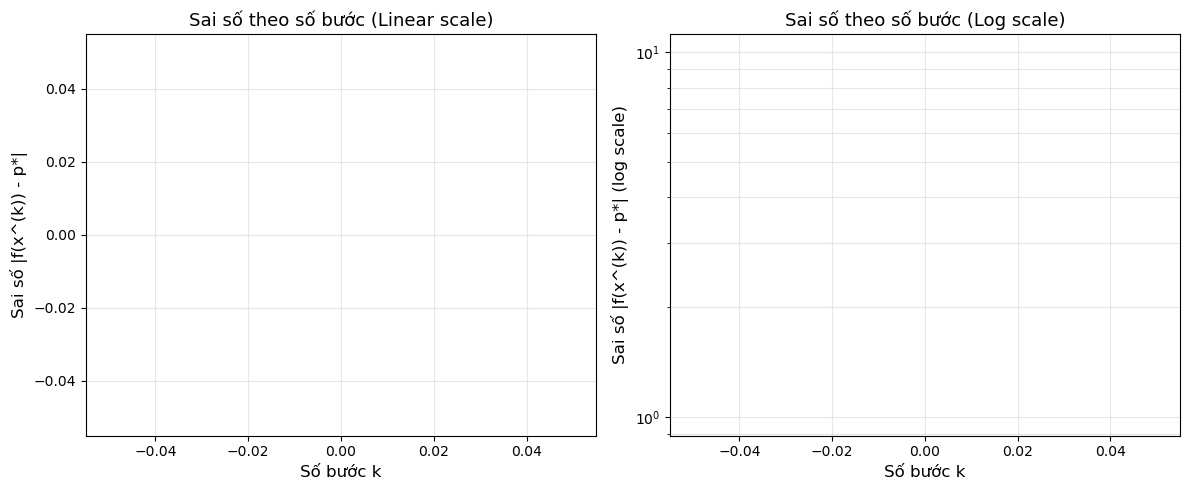


KẾT LUẬN

1. Hàm f(x) là hàm lồi và có duy nhất một điểm cực tiểu toàn cục.

2. Gradient Descent với Exact Line Search hội tụ tuyến tính về nghiệm.
   - Đồ thị log scale cho thấy sai số giảm theo cấp số nhân.
   - Đây là đặc trưng của tốc độ hội tụ tuyến tính.

3. Exact Line Search giúp chọn learning rate tối ưu tại mỗi bước,
   đảm bảo hàm mục tiêu giảm nhanh nhất có thể.

4. So với Newton's method, Gradient Descent cần nhiều bước hơn
   nhưng mỗi bước đơn giản hơn (không cần tính Hessian).


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# ============================================
# CÂU A: Tính gradient và Hessian
# ============================================

def compute_gradient(x, c, A, b):
    """
    Tính gradient của f(x) = c^T x - sum(log(b_i - a_i^T x))
    
    Công thức: ∇f(x) = c + sum(a_i / (b_i - a_i^T x))
    
    Args:
        x: vector n chiều
        c: vector hệ số n chiều
        A: ma trận m×n (mỗi cột là a_i)
        b: vector m chiều
    
    Returns:
        gradient: vector n chiều
    """
    m = A.shape[1]  # số ràng buộc
    grad = c.copy()
    
    for i in range(m):
        a_i = A[:, i]
        denominator = b[i] - np.dot(a_i, x)
        grad += a_i / denominator
    
    return grad


def compute_hessian(x, A, b):
    """
    Tính Hessian của f(x)
    
    Công thức: ∇²f(x) = sum(a_i a_i^T / (b_i - a_i^T x)²)
    
    Args:
        x: vector n chiều
        A: ma trận m×n
        b: vector m chiều
    
    Returns:
        hessian: ma trận n×n
    """
    n = A.shape[0]  # số chiều
    m = A.shape[1]  # số ràng buộc
    hessian = np.zeros((n, n))
    
    for i in range(m):
        a_i = A[:, i]
        denominator = b[i] - np.dot(a_i, x)
        # a_i a_i^T / (b_i - a_i^T x)²
        hessian += np.outer(a_i, a_i) / (denominator ** 2)
    
    return hessian


def objective_function(x, c, A, b):
    """
    Tính giá trị hàm mục tiêu f(x) = c^T x - sum(log(b_i - a_i^T x))
    """
    m = A.shape[1]
    f = np.dot(c, x)
    
    for i in range(m):
        a_i = A[:, i]
        val = b[i] - np.dot(a_i, x)
        if val <= 0:
            return np.inf  # Nằm ngoài miền xác định
        f -= np.log(val)
    
    return f


def is_in_domain(x, A, b):
    """
    Kiểm tra x có trong miền xác định không
    Miền xác định: {x : b_i - a_i^T x > 0, ∀i}
    """
    m = A.shape[1]
    for i in range(m):
        a_i = A[:, i]
        if b[i] - np.dot(a_i, x) <= 0:
            return False
    return True


# ============================================
# CHỨNG MINH TÍNH LỒI (In ra màn hình)
# ============================================

def print_convexity_proof():
    """
    In ra chứng minh tính lồi của hàm f
    """
    print("=" * 70)
    print("CHỨNG MINH TÍNH LỒI CỦA HÀM f(x)")
    print("=" * 70)
    print("\nHàm f(x) = c^T x - Σ log(b_i - a_i^T x)")
    print("\n1. Gradient:")
    print("   ∇f(x) = c + Σ [a_i / (b_i - a_i^T x)]")
    print("\n2. Hessian:")
    print("   ∇²f(x) = Σ [a_i a_i^T / (b_i - a_i^T x)²]")
    print("\n3. Chứng minh tính lồi:")
    print("   - Với mọi vector v ∈ ℝⁿ:")
    print("     v^T ∇²f(x) v = Σ [v^T a_i a_i^T v / (b_i - a_i^T x)²]")
    print("                  = Σ [(a_i^T v)² / (b_i - a_i^T x)²]")
    print("                  ≥ 0")
    print("   - Do đó ∇²f(x) là nửa xác định dương")
    print("   - Vậy f(x) là hàm lồi trên miền xác định của nó")
    print("=" * 70)
    print()


# ============================================
# CÂU B: Tìm nghiệm tối ưu bằng Newton's method
# ============================================

def newton_method(x0, c, A, b, tol=1e-8, max_iter=100):
    """
    Thuật toán Newton để tìm nghiệm tối ưu
    
    Công thức: x^(k+1) = x^(k) - [∇²f(x^(k))]^(-1) ∇f(x^(k))
    """
    x = x0.copy()
    
    for k in range(max_iter):
        # Tính gradient và Hessian
        grad = compute_gradient(x, c, A, b)
        hess = compute_hessian(x, A, b)
        
        # Newton step
        try:
            delta_x = np.linalg.solve(hess, -grad)
        except:
            print(f"Hessian không khả nghịch tại bước {k}")
            break
        
        # Cập nhật
        x_new = x + delta_x
        
        # Kiểm tra hội tụ
        if np.linalg.norm(grad) < tol:
            print(f"Newton method hội tụ sau {k+1} bước")
            return x_new
        
        x = x_new
    
    print(f"Newton method đạt max_iter = {max_iter}")
    return x


# ============================================
# CÂU C: Gradient Descent với Exact Line Search
# ============================================

def exact_line_search(x, direction, c, A, b):
    """
    Tìm learning rate tối ưu: α* = argmin_α f(x + α*direction)
    """
    def f_alpha(alpha):
        x_new = x + alpha * direction
        if not is_in_domain(x_new, A, b):
            return np.inf
        return objective_function(x_new, c, A, b)
    
    # Tìm khoảng chứa minimum
    alpha_max = 1.0
    while alpha_max > 1e-10:
        if is_in_domain(x + alpha_max * direction, A, b):
            break
        alpha_max *= 0.5
    
    if alpha_max <= 1e-10:
        return 1e-10
    
    # Tối ưu hóa trong khoảng [0, alpha_max]
    result = minimize_scalar(f_alpha, bounds=(0, alpha_max), method='bounded')
    return result.x


def gradient_descent_exact_line_search(x0, c, A, b, p_star, max_iter=1000, tol=1e-10):
    """
    Gradient Descent với Exact Line Search
    
    Args:
        x0: điểm khởi tạo
        c, A, b: tham số bài toán
        p_star: giá trị tối ưu (để tính error)
        max_iter: số bước tối đa
        tol: ngưỡng dừng
    
    Returns:
        history: lịch sử các điểm x^(k)
        errors: lịch sử sai số |f(x^(k)) - p*|
    """
    x = x0.copy()
    history = [x.copy()]
    errors = [abs(objective_function(x, c, A, b) - p_star)]
    
    for k in range(max_iter):
        # Tính gradient
        grad = compute_gradient(x, c, A, b)
        
        # Kiểm tra điều kiện dừng
        if np.linalg.norm(grad) < tol:
            print(f"Gradient Descent hội tụ sau {k+1} bước")
            break
        
        # Tìm learning rate tối ưu
        direction = -grad
        alpha = exact_line_search(x, direction, c, A, b)
        
        # Cập nhật
        x = x + alpha * direction
        
        # Lưu lịch sử
        history.append(x.copy())
        f_val = objective_function(x, c, A, b)
        errors.append(abs(f_val - p_star))
        
        # In tiến trình
        if (k + 1) % 10 == 0:
            print(f"Bước {k+1}: f(x) = {f_val:.8f}, error = {errors[-1]:.2e}, ||grad|| = {np.linalg.norm(grad):.2e}")
    
    return history, errors


# ============================================
# MAIN: Thực hiện các câu hỏi
# ============================================

def main():
    # Câu A: In chứng minh
    print_convexity_proof()
    
    # Câu B: Thiết lập dữ liệu
    print("=" * 70)
    print("CÂU B: TÌM NGHIỆM TỐI ƯU")
    print("=" * 70)
    
    # Ma trận A (3×4)
    A = np.array([
        [0, -2, -1, -2],
        [-1, 1, -3, 0],
        [1, -1, 2, -5]
    ], dtype=float)
    
    b = np.array([3, -1, 3, 2], dtype=float)
    c = np.array([4, 11/4, 13/4], dtype=float)
    
    print("\nMa trận A:")
    print(A)
    print("\nVector b:", b)
    print("Vector c:", c)
    
    # Tìm điểm khả thi ban đầu
    x_init = np.array([0.0, 0.0, 0.0])
    
    # Kiểm tra và điều chỉnh nếu cần
    if not is_in_domain(x_init, A, b):
        x_init = np.array([-0.5, 0.5, 0.5])
    
    print(f"\nĐiểm khởi tạo cho Newton: x_init = {x_init}")
    
    # Tìm nghiệm tối ưu bằng Newton's method
    x_star = newton_method(x_init, c, A, b)
    p_star = objective_function(x_star, c, A, b)
    
    print(f"\nĐiểm tối ưu x* = {x_star}")
    print(f"Giá trị tối ưu p* = {p_star:.10f}")
    
    # Kiểm tra gradient tại điểm tối ưu
    grad_star = compute_gradient(x_star, c, A, b)
    print(f"||∇f(x*)|| = {np.linalg.norm(grad_star):.2e}")
    
    # Câu C: Gradient Descent với Exact Line Search
    print("\n" + "=" * 70)
    print("CÂU C: GRADIENT DESCENT VỚI EXACT LINE SEARCH")
    print("=" * 70)
    
    x0 = np.array([-1.0, 1.0, 0.0])
    print(f"\nĐiểm khởi tạo: x^(0) = {x0}")
    print(f"f(x^(0)) = {objective_function(x0, c, A, b):.10f}")
    
    # Chạy Gradient Descent
    history, errors = gradient_descent_exact_line_search(x0, c, A, b, p_star, max_iter=100)
    
    print(f"\nSố bước thực hiện: {len(history) - 1}")
    print(f"Điểm cuối: x^(final) = {history[-1]}")
    print(f"Sai số cuối: {errors[-1]:.2e}")
    
    # Vẽ đồ thị sai số
    plt.figure(figsize=(12, 5))
    
    # Đồ thị 1: Linear scale
    plt.subplot(1, 2, 1)
    plt.plot(range(len(errors)), errors, 'b-o', markersize=4)
    plt.xlabel('Số bước k', fontsize=12)
    plt.ylabel('Sai số |f(x^(k)) - p*|', fontsize=12)
    plt.title('Sai số theo số bước (Linear scale)', fontsize=13)
    plt.grid(True, alpha=0.3)
    
    # Đồ thị 2: Log scale
    plt.subplot(1, 2, 2)
    plt.semilogy(range(len(errors)), errors, 'r-o', markersize=4)
    plt.xlabel('Số bước k', fontsize=12)
    plt.ylabel('Sai số |f(x^(k)) - p*| (log scale)', fontsize=12)
    plt.title('Sai số theo số bước (Log scale)', fontsize=13)
    plt.grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.savefig('convergence_plot.png', dpi=150, bbox_inches='tight')
    print("\nĐồ thị đã được lưu vào file 'convergence_plot.png'")
    plt.show()
    
    # Kết luận
    print("\n" + "=" * 70)
    print("KẾT LUẬN")
    print("=" * 70)
    print("\n1. Hàm f(x) là hàm lồi và có duy nhất một điểm cực tiểu toàn cục.")
    print("\n2. Gradient Descent với Exact Line Search hội tụ tuyến tính về nghiệm.")
    print("   - Đồ thị log scale cho thấy sai số giảm theo cấp số nhân.")
    print("   - Đây là đặc trưng của tốc độ hội tụ tuyến tính.")
    print("\n3. Exact Line Search giúp chọn learning rate tối ưu tại mỗi bước,")
    print("   đảm bảo hàm mục tiêu giảm nhanh nhất có thể.")
    print("\n4. So với Newton's method, Gradient Descent cần nhiều bước hơn")
    print("   nhưng mỗi bước đơn giản hơn (không cần tính Hessian).")
    print("=" * 70)


if __name__ == "__main__":
    main()

In [12]:
def f(x):
    """Hàm mục tiêu f(x1, x2)"""
    x1, x2 = x[0], x[1]
    A = anp.array([[0, -1, 2, 1/3.], 
                  [-2, 4, -3, -2/7.], 
                  [0, -2, 5, 0]])
    b = anp.array([0, -1, 2, 2])
    c = anp.array([-1+ (7*anp.exp(1)/3), 2 - (23*anp.exp(1))/7, -2 + anp.exp(1)*5 ])
    term1 = anp.dot(c.T, x)
    # anp.dot(A, x) sẽ cho ra một vector 4 chiều, khớp với b
    log_terms = anp.exp(b - anp.dot(A.T, x))
    term2 = anp.sum(log_terms)
    
    return term1 + term2 

# Tạo gradient tự động bằng autograd
grad_f = grad(lambda x: f(x))  # đạo hàm tự động của f(x) theo vector x

def find_optimum(grad_f, f):
    """
    Tìm x* và p* bằng cách tối thiểu hóa ||∇f(x)||²
    """
    x0 = np.zeros(3)
    # định nghĩa hàm phụ
    def g_norm2(x): 
        g = grad_f(x)
        return np.sum(g**2)
    
    res = minimize(g_norm2, x0, method='BFGS')
    x_star = res.x
    p_star = f(x_star)
    return x_star, p_star
# Gọi hàm tìm nghiệm
x_star, p_star = find_optimum(grad_f, f)

print("\n--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---")
print(f"x* = {x_star}")
print(f"p* = f(x*) = {p_star:.6f}")
# ===================


--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---
x* = [ 3.00013665e+00  7.86077727e-06 -1.00005033e+00]
p* = f(x*) = 11.873127


In [13]:
import autograd.numpy as anp
from autograd import grad
from scipy.optimize import minimize
import numpy as np

def f(x):
    A = anp.array([[0, -1,  2,  1/3],   # sửa lại +1/3
                   [-2, 4, -3, -2/7],
                   [0, -2,  5,    0]])
    b = anp.array([0, -1, 2, 2])
    c = anp.array([-1 + 7*anp.exp(1)/3,  2 - 23*anp.exp(1)/7,  -2 + 5*anp.exp(1)])
    Ax = anp.dot(A.T, x)                     # (m,)
    return anp.dot(c, x) + anp.sum(anp.exp(b - Ax))

grad_f = grad(f)

def find_optimum(f, grad_f, x0=None):
    if x0 is None: x0 = np.zeros(3, dtype=float)
    res = minimize(f, x0, jac=grad_f, method="BFGS")
    return res.x, float(f(res.x))

x_star, p_star = find_optimum(f, grad_f)
print("x* =", x_star)
print("f(x*) =", p_star)


x* = [ 3.00000031e+00  1.55109299e-08 -1.00000012e+00]
f(x*) = 11.873127313836193
